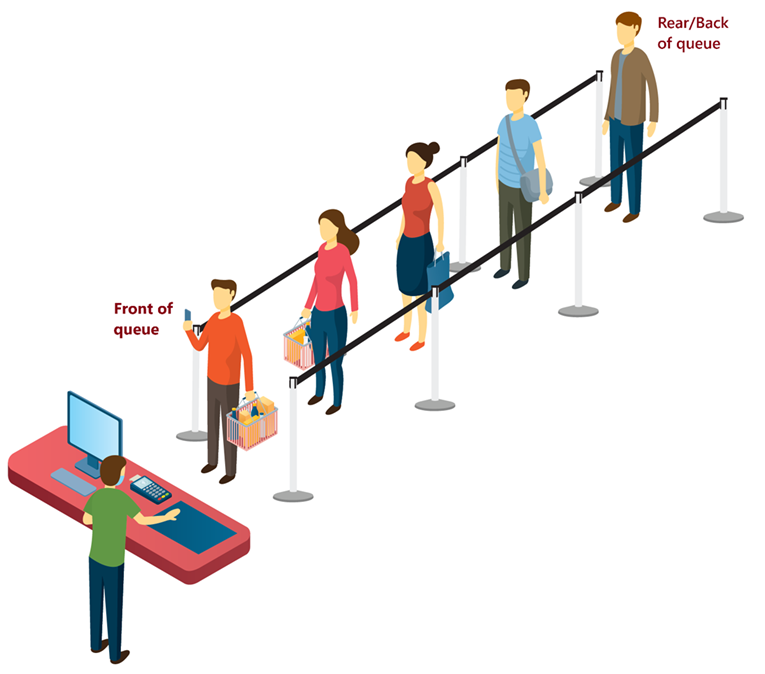

*   Stack- Lifo (Last in 1st out),
*   Queue- Fifo (First in 1st out)



# Queue

### **Real-Life Examples**
- Works like a real-life queue.
    - **Bus queue**: The first person in line boards first.
    - **Bank queue**: The cashier serves the first customer in line.

### **Usage of Queue: Importance in Computing**
- **Resource Management**:  
  - Used in handling **shared resources** like printers, ensuring requests are processed in order.
- **Process Scheduling**:  
  - The **CPU manages multiple tasks** by placing **commands in a queue**.
  - Helps in executing multiple programs efficiently.




### **Primary vs. Secondary Data Structures**
- **Primary Data Structures** (e.g., arrays, linked lists) serve as the foundation for building more complex structures.
- **Secondary Data Structures** (e.g., stacks, queues) are created using primary structures.

### **Understanding Queue**
- A **queue** is an **adapter class** or **Secondary Data Structures**, meaning it is built on top of other data structures.

- The underlying structure can be:
  - **Array** (Circular array)
  - **Linked List**
  - **Vector**
  - **ArrayList**

  - Any other sequence (e.g., **Collection class in JDK**).
  
- **The first item added, is the first one to be removed.** Follows the **First In, First Out (FIFO)** principle:
  - **Enqueue** (insert) happens at the **rear/back**. [append]
  - **Dequeue** (remove) happens at the **front**. [remove from front]

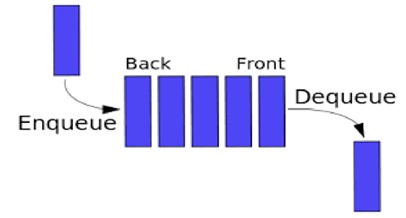

### **Queue Main Operations**
1. **Enqueue(obj)**  
    - Inserts an object at the **rear (tail) **of the queue.
    - If the queue is full (fixed size), throws a QueueOverflow error.
    - Time Complexity: O(1)

2. **Dequeue**  
    - **Removes and returns** the object from the **front **of the queue.
    - If the queue is empty, throws a QueueUnderflow error.
    - Time Complexity: O(1)

3. **Peek**  
    - Returns the object at the front **without removing it**.
    - If the queue is empty, throws a QueueUnderflow error.
    - Time Complexity: O(1)

### **Key Performance Requirement**
- **Enqueue, dequeue and peek operations** must run in **constant time** (O(1))
  - meaning the operation time is **independent of the queue size**.
  
#### **Restrictions in Queue**
- Items **cannot** be added or removed from the **middle.**
- **Only the earliest added** item can be **removed first.** (FIFO)

##### **Error Handling**
- **Overflow Error**: Occurs when trying to enqueue into a **full queue** (fixed capacity).  
- **Underflow Error**: Occurs when trying to dequeue or peek from an **empty queue.**  


## **Queue Interface (Standard Library Implementation)**
Queue Methods and Functionality: A queue must implement the following methods:

### **1. `size()`**
- Returns the **number of items** in the queue.

### **2. `isEmpty()`**
- Returns **true** if the queue is empty, otherwise **false**.

### **3. `enqueue(Object o)`**
- Adds a new item to the **back** of the queue.  
- **Throws `QueueOverflowException`** if the queue has reached its maximum capacity (for bounded queues).  
- No exception thrown for **unbounded queues** that adjust capacity dynamically.

### **4. `dequeue()`**
- Removes and returns the item at the **front** of the queue.  
- **Throws `QueueUnderflowException`** if the queue is empty.

### **5. `peek()`**
- Returns the item at the **front** of the queue **without removing it.**
- **Throws `QueueUnderflowException`** if the queue is empty.

### **6. `toString()`** --- Optional--not needed for exam
- Returns a **textual representation** of the queue, e.g., "[x y z]" where `x` is at the front and `z` is at the back.

### **7. `toArray()`** --- Optional--not needed for exam
- Converts the queue to an **array**, with the front item at the first slot and the back item at the last slot.

### **8. `search(Object o)`** --- Optional--not needed for exam
- Searches for an item in the queue, returning the **offset (index from the starting point/front)** from the front if found, or **-1** if not found.



## Queue Implementation
- Circular array
- Linked lists
    - non-dummy headed singly linear LL (**Must maintain additional tail/rear Node**)
    - Dummy headed **Doubly Circular** LL (Tail/rear is head.prev)
    - Non-headed **Doubly Circular** LL (Tail/rear is head.prev)

## Circular Array-Based Queue Implementation--- Optional--not needed for exam

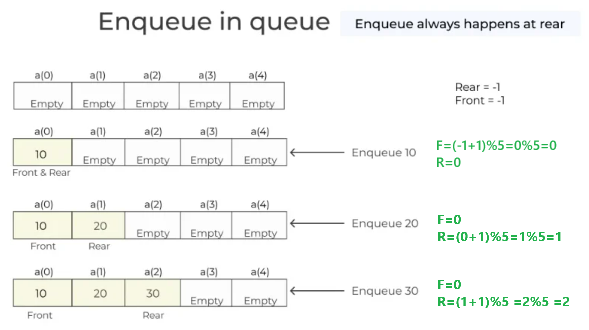

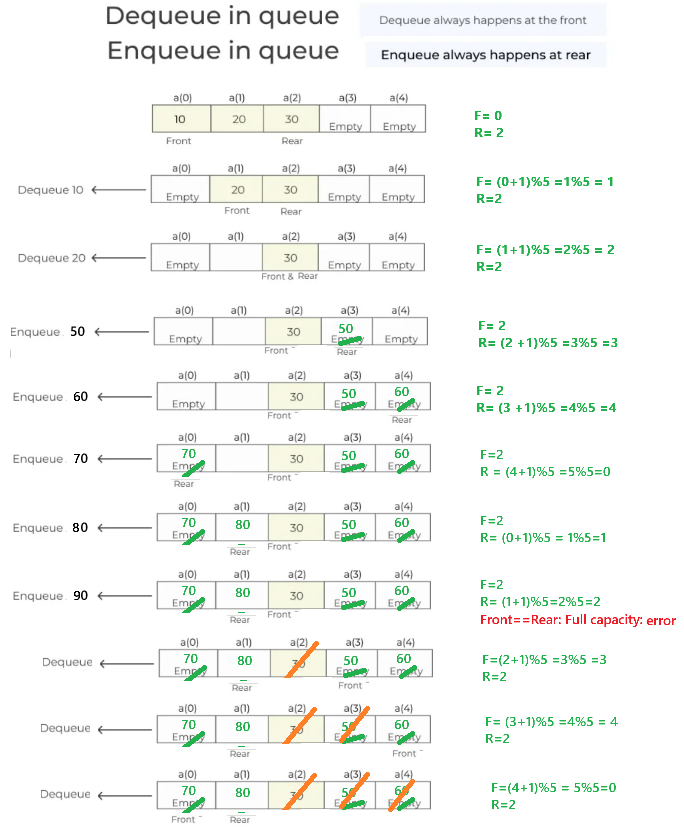

In [ ]:
class QueueOverflowException(Exception):
    pass

class QueueUnderflowException(Exception):
    pass

class CircularArrayQueue:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.queue = [None] * self.capacity
        self.front = -1  # Index of the front element
        self.rear = -1   # Index of the last element
        self.size_ = 0

    def size(self):
        """Returns the number of items in the queue."""
        return self.size_

    def isEmpty(self):
        """Returns True if the queue is empty."""
        return self.size_ == 0

    def enqueue(self, item):
        """Adds an item to the back of the queue."""
        if self.size_ == self.capacity:
            raise QueueOverflowException("Queue is full")

        if self.isEmpty():
            self.front = self.rear = 0
        else:
            self.rear = (self.rear + 1) % self.capacity

        self.queue[self.rear] = item
        self.size_ += 1

    def dequeue(self):
        """Removes and returns the front item of the queue."""
        if self.isEmpty():
            raise QueueUnderflowException("Queue is empty")

        item = self.queue[self.front]
        self.queue[self.front] = None  # Optional: clear reference

        if self.front == self.rear:
            # Queue becomes empty after removal
            self.front = self.rear = -1
        else:
            self.front = (self.front + 1) % self.capacity

        self.size_ -= 1
        return item

    def peek(self):
        """Returns the front item without removing it."""
        if self.isEmpty():
            raise QueueUnderflowException("Queue is empty")
        return self.queue[self.front]

     # OPTIONAL---NOT NEEDED FOR EXAM
    def toString(self):
        """Returns a string representation of the queue."""
        result = "["
        if not self.isEmpty():
            i = self.front
            count = 0
            while count < self.size_:
                result += str(self.queue[i])
                if count != self.size_ - 1:
                    result += ", "
                i = (i + 1) % self.capacity
                count += 1
        result += "]"
        return result

    def toArray(self):  # OPTIONAL---NOT NEEDED FOR EXAM
        """Returns an array representation of the queue."""
        result = []
        if not self.isEmpty():
            i = self.front
            count = 0
            while count < self.size_:
                result.append(self.queue[i])
                i = (i + 1) % self.capacity
                count += 1
        return result

    def search(self, item):  # OPTIONAL---NOT NEEDED FOR EXAM
        """Returns the offset from the front if item is found; else -1."""
        if self.isEmpty():
            return -1
        i = self.front
        count = 0
        while count < self.size_:
            if self.queue[i] == item:
                return count  # Offset from front
            i = (i + 1) % self.capacity
            count += 1
        return -1

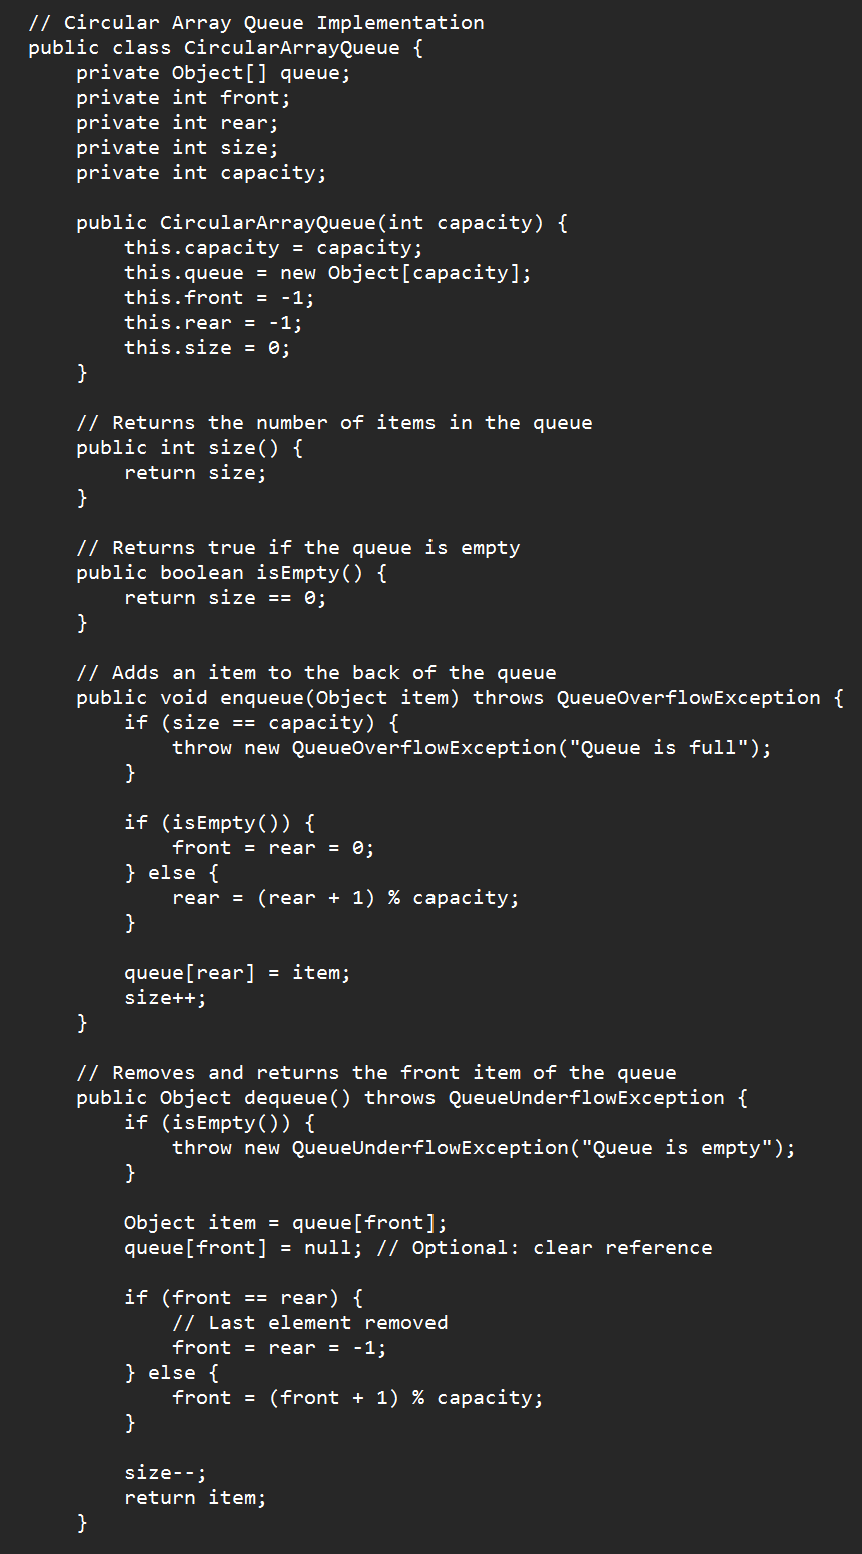

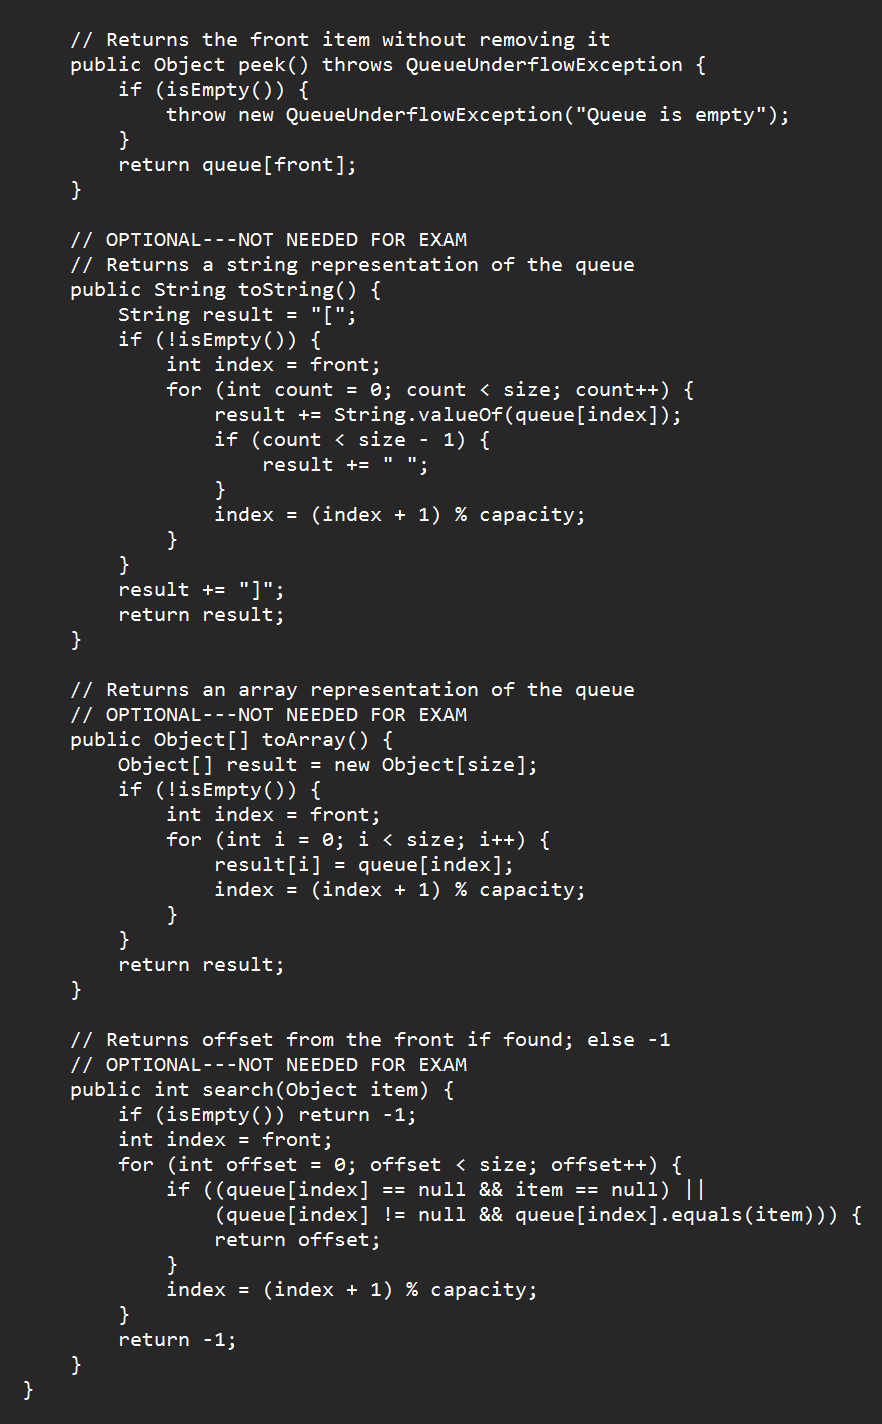

In [ ]:
q = CircularArrayQueue(3)

try:
    q.enqueue(10)   # Enqueued: 10
    q.enqueue(20)   # Enqueued: 20
    q.enqueue(30)   # Enqueued: 30
except QueueOverflowException as e:
    print("Overflow:", e)

print("Trying to insert in a full queue")
try:
    q.enqueue(40)   # Should raise QueueOverflowException
except QueueOverflowException as e:
    print("Overflow:", e)

Trying to insert in a full queue
Overflow: Queue is full


In [ ]:
try:
    print(q.dequeue())     # Dequeued: 10
    print(q.peek())        # Front item: 20
    print(q.dequeue())     # Dequeued: 20
    print(q.dequeue())     # Dequeued: 30
except QueueUnderflowException as e:
    print("Underflow:", e)

print("Trying to remove from an empty queue")
try:
    print(q.dequeue())     # Should raise QueueUnderflowException
except QueueUnderflowException as e:
    print("Underflow:", e)

10
20
20
30
Trying to remove from an empty queue
Underflow: Queue is empty


## Linked List-Based Queue Implementation

- A **queue** can be implemented using a **linked list** with **two pointers**:
  - **Front pointer**: Used for **dequeue** and **peek** operations.
  - **Rear pointer**: Used for **enqueue** operations.

-  **Advantages**
    - **Dynamic sizing**: No fixed capacity, no need for a **QueueOverflowException**.
    - **Efficient operations**: Both **enqueue** and **dequeue** run in **constant time** (O(1)).


- **Additional Notes**
    - **QueueOverflowException** is not needed as the linked list is unbounded.
    - Both **enqueue** and **dequeue** operations have **constant time complexity** (O(1)) due to the use of pointers.


## Linked lists based Implementations
   - non-dummy headed singly linear LL (**Must maintain additional tail/rear Node**) [L3-L4]
   - Dummy headed **Doubly Circular** LL (Tail/rear is head.prev) [L6]
   - Non-headed **Doubly Circular** LL (Tail/rear is head.prev) [Try out on your own]

## Optional/ skip for exams
- toString()
- toArray()
- search(Object o)
- display_queue()

### Implementation of Queue using **non-dummy headed singly linear LL** (Used concepts from L3-L4)

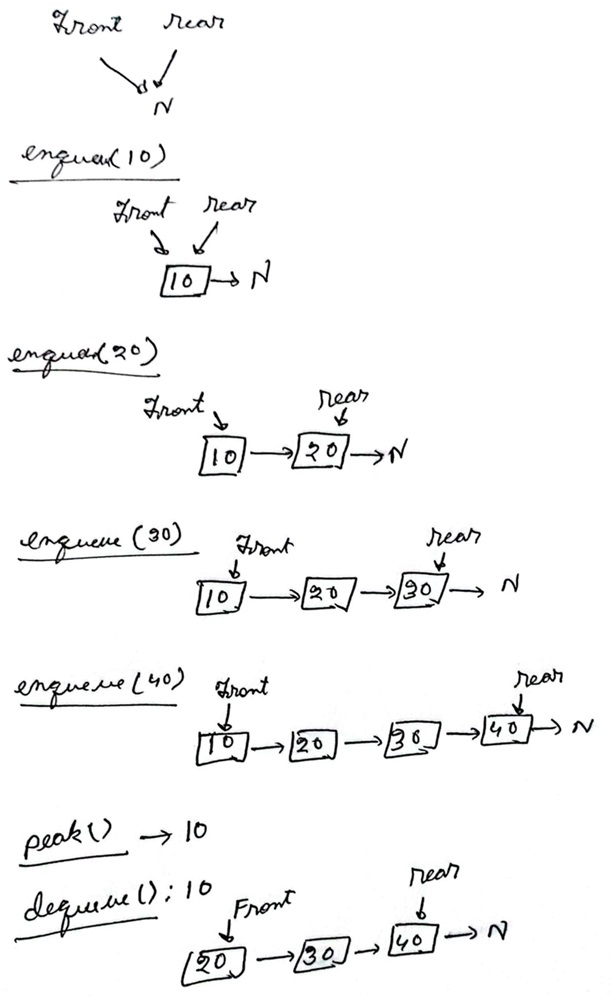

In [ ]:
class Node:
    def __init__(self, elem):
        """Initializes a node with the given element and a next pointer."""
        self.elem = elem
        self.next = None

class LinkedListQueue:
    def __init__(self):
        """Initializes an empty queue with front and rear pointers."""
        self.front = self.rear = None
        self._size = 0  # Track the size of the queue

    def is_empty(self):
        """Returns True if the queue is empty, otherwise False."""
        return self._size == 0

    def size(self):
        """Returns the number of elements in the queue."""
        return self._size

    def enqueue(self, elem):# CreateLL()--method
        """Adds an element to the rear of the queue."""

        new_node = Node(elem)
        if self.rear is None: # empty LL
            self.front = self.rear = new_node
        else: # append at tail/rear
            self.rear.next = new_node
            self.rear = new_node

        self._size += 1

    def dequeue(self): # remove from index=0
        """Removes and returns the element from the front of the queue."""
        if self.is_empty():
            raise IndexError("Underflow: Queue is empty")

        removed_elem = self.front.elem
        self.front = self.front.next
        if self.front is None: # there was only 1 element in LL
            self.rear = None
        self._size -= 1
        return removed_elem

    def peek(self):
        """Returns the element at the front of the queue without removing it."""
        if self.is_empty():
            raise IndexError("Underflow:Queue is empty")

        return self.front.elem

    #Optional--Not need for exam
    def search(self, obj):
        """Searches for an element in the queue and returns its index, or -1 if not found."""
        current = self.front
        index = 0
        while current!=None:
            if current.elem == obj:
                return index
            current = current.next
            index += 1
        return -1  # Not found

    #Optional--Not need for exam
    def toString(self):
        """Returns a string representation of the queue."""
        if self.is_empty():
            return "[]"
        current = self.front
        queue_str = "["
        while current!=None:
            queue_str += str(current.elem) + " "
            current = current.next
        queue_str = queue_str.strip() + "]"
        return queue_str

    #Optional--Not need for exam
    def toArray(self):
        """Converts the queue to a list and returns it."""
        arr = []
        current = self.front
        while current!= None:
            arr.append(current.elem)
            current = current.next
        return arr

    #Optional--Not need for exam
    def display_queue(self):
        """Displays the queue from front to rear."""
        current = self.front
        print("Queue (front to rear):", end=" ")
        while current!=None:
            print(f"{current.elem} ->", end=" ")
            current = current.next
        print("NULL")

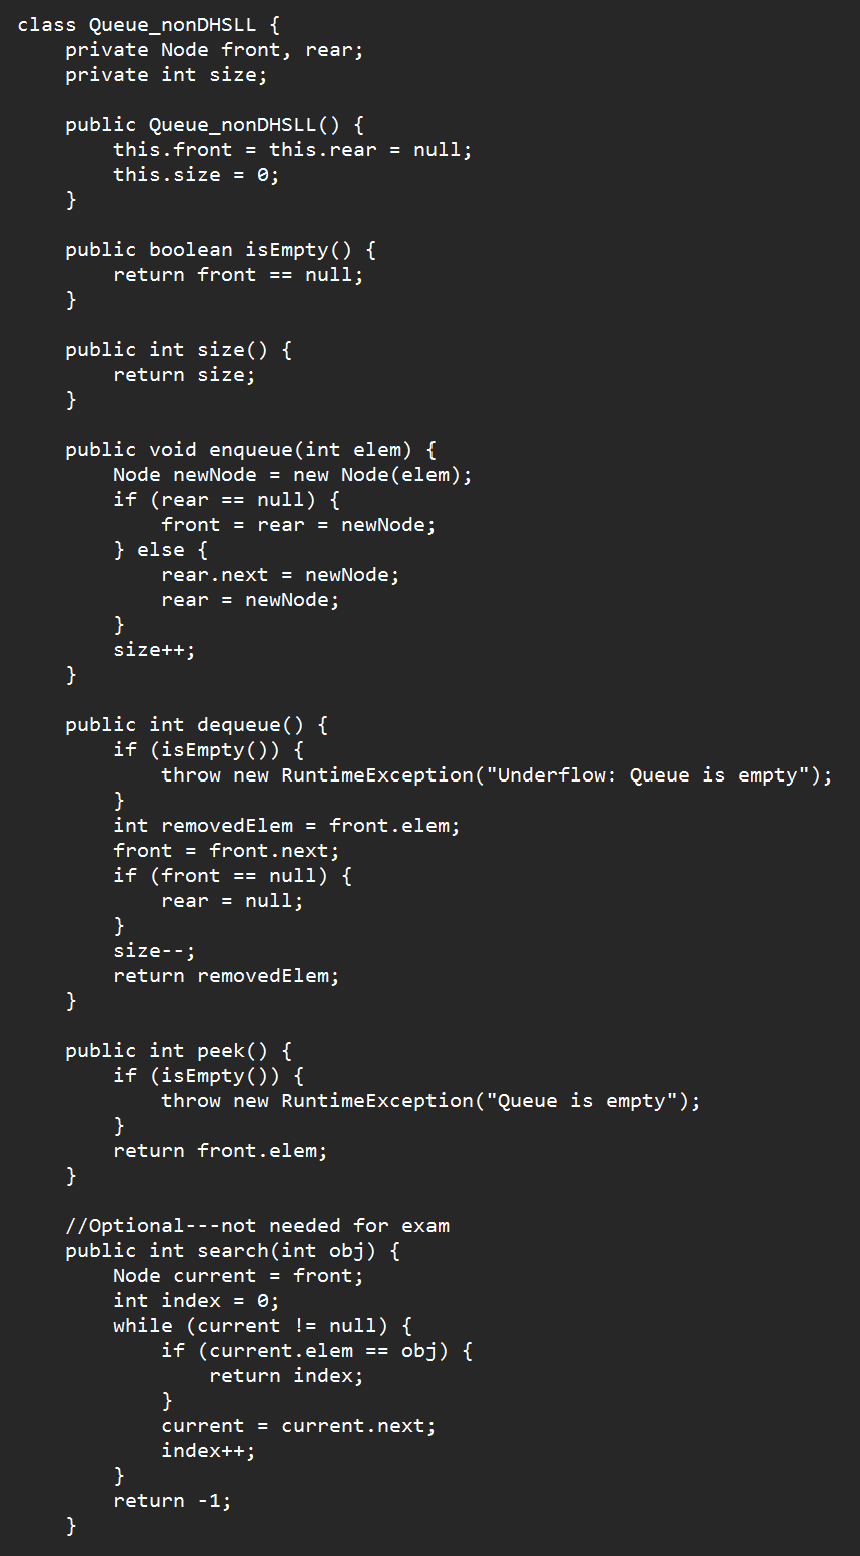

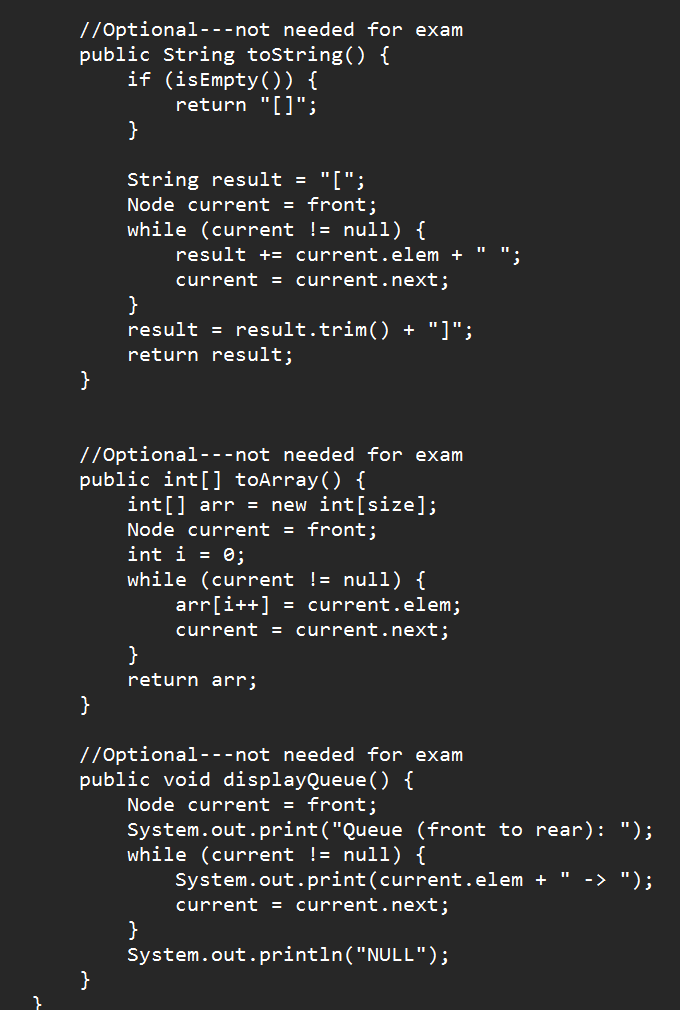

In [ ]:
# Test the LinkedListQueue with additional methods
queue = LinkedListQueue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
queue.enqueue(40)

print("Original Queue:")
queue.display_queue()  #  Queue (front to rear): 10 -> 20 -> 30 -> 40 -> NULL

# Check size
print("Size of queue:", queue.size())  # Size of queue: 4

# Peek at front element
print("Peek at front element:", queue.peek())  # Peek at front element: 10

# Search for an element
print("Search for 20 in the queue:", queue.search(20))  # 1
print("Search for 40 in the queue:", queue.search(40))  # 3
print("Search for 60 in the queue:", queue.search(60))  # -1

# Convert queue to string and array
print("Queue as string:", queue.toString())  #[10 20 30 40]
print("Queue as array:", queue.toArray())  # [10, 20, 30, 40]

# Dequeue an element
queue.dequeue()  # Removes 10 from the queue
queue.dequeue()  # Removes 20 from the queue
print("Queue after dequeue:")
queue.display_queue()  # Queue (front to rear): 30 -> 40 -> NULL

# Check size again
print("Size of queue after dequeue:", queue.size())  # 2

# Empty the queue using a loop and trigger underflow errors
print("\nEmptying the queue...")
while not queue.is_empty():
    print("Dequeued element:", queue.dequeue()) # 30, 40

Original Queue:
Queue (front to rear): 10 -> 20 -> 30 -> 40 -> NULL
Size of queue: 4
Peek at front element: 10
Search for 20 in the queue: 1
Search for 40 in the queue: 3
Search for 60 in the queue: -1
Queue as string: [10 20 30 40]
Queue as array: [10, 20, 30, 40]
Queue after dequeue:
Queue (front to rear): 30 -> 40 -> NULL
Size of queue after dequeue: 2

Emptying the queue...
Dequeued element: 30
Dequeued element: 40


In [ ]:
# Trying to peek when the queue is empty (should raise an underflow error)
try:
    print("Peek at front element:", queue.peek())
except IndexError as e:
    print(f"Error: {e}")  # Error: Queue Underflow: Queue is empty


# Trying to dequeue when the queue is empty (should raise an underflow error)
try:
    print("Dequeued element:", queue.dequeue())
except IndexError as e:
    print(f"Error: {e}")  # Error: Queue Underflow: Queue is empty

Error: Underflow:Queue is empty
Error: Underflow: Queue is empty


### Implementation of Queue using **Dummy-headed Doubly Circular LL** (Used concepts from L6)

In [ ]:
import numpy as np
class DNode:
    def __init__(self, elem, next=None, prev=None):
        """Initializes a node with the given element, next, and previous pointers."""
        self.elem = elem
        self.next = next
        self.prev = prev

class QueueLL:
    def __init__(self):
        """Initializes an empty queue with a dummy-headed doubly circular linked list."""
        self.head = DNode(None)  # Dummy head node
        self.head.next = self.head.prev = self.head  # Points to itself (circular)
        self._size = 0  # Track the size of the queue

    def is_empty(self):
        """Returns True if the queue is empty, otherwise False."""
        return self._size == 0

    def size(self):
        """Returns the number of elements in the queue."""
        return self._size


    def enqueue(self, elem): # insertion at size (after tail)--append code
        """Adds an element to the rear of the queue."""

        #-------------append code()-----------------------------
        new_node = DNode(elem)
        predecessor = self.head.prev  # The predecessor is the tail (current last node (rear))
        successor = predecessor.next #successor = self.head  --Both correct
                               # the node after the tail node
                               # The successor is always the head node in a circular list

        new_node.prev = predecessor  # The new node's previous pointer points to the current last node (predecessor)
        new_node.next = successor  # The new node's next pointer points to the head (successor)


        predecessor.next = new_node  # The current last node (predecessor) points to the new node
        successor.prev = new_node  # The dummy head (successor) points back to the new node
        #----------------------------------------------------

        self._size += 1  # After adding the element, increment the queue size


    def dequeue(self): # removal at index=0 (Node after DH)
        """Removes and returns the element from the front of the queue."""
        if self.is_empty():
            raise IndexError("Underflow: Queue is empty")

        #---------removal at index=0 (Node after DH)------------------
        predecessor = self.head  # The predecessor of rem_node is always the head (dummy node)
        rem_node = self.head.next  # This is the node to be removed
        successor = rem_node.next # node after the node to be removed

        predecessor.next = successor  # The head's next pointer now points to the successor node
        successor.prev = predecessor  # The successor's previous pointer now points to the dummy head

        rem_node.next = rem_node.prev = None  # Set both next and prev pointers of the removed node to None
        #-------------------------------------------

        self._size -= 1  # After removing the element, decrease the size of the queue by 1
        return rem_node.elem  # Return the element that was removed from the front of the queue


    def peek(self):
        """Returns the element at the front of the queue without removing it."""
        if self.is_empty():
            raise IndexError("Underflow:Queue is empty")

        return self.head.next.elem

    #Optional--Not need for exam
    def toString(self):
        """Returns a string representation of the queue."""
        if self.is_empty():
            return "[]"

        current = self.head.next
        queue_str = "["
        while current != self.head:
            queue_str += str(current.elem) + " "
            current = current.next
        queue_str = queue_str.strip() + "]"
        return queue_str

    #Optional--Not need for exam
    def toArray(self):
        """Converts the queue to a list and returns it."""
        arr = []
        current = self.head.next
        while current != self.head:
            arr.append(current.elem)
            current = current.next
        return arr

    #Optional--Not need for exam
    def search(self, obj):
        """Searches for an element in the queue and returns its index, or -1 if not found."""
        current = self.head.next
        index = 0
        while current != self.head:
            if current.elem == obj:
                return index
            current = current.next
            index += 1
        return -1  # Not found

    #Optional--Not need for exam
    def display_queue(self):
        """Displays the queue from front to rear."""
        current = self.head.next
        print("Queue (front to rear):", end=" ")
        while current != self.head:
            print(f"{current.elem} <->", end=" ")
            current = current.next
        print("NULL")

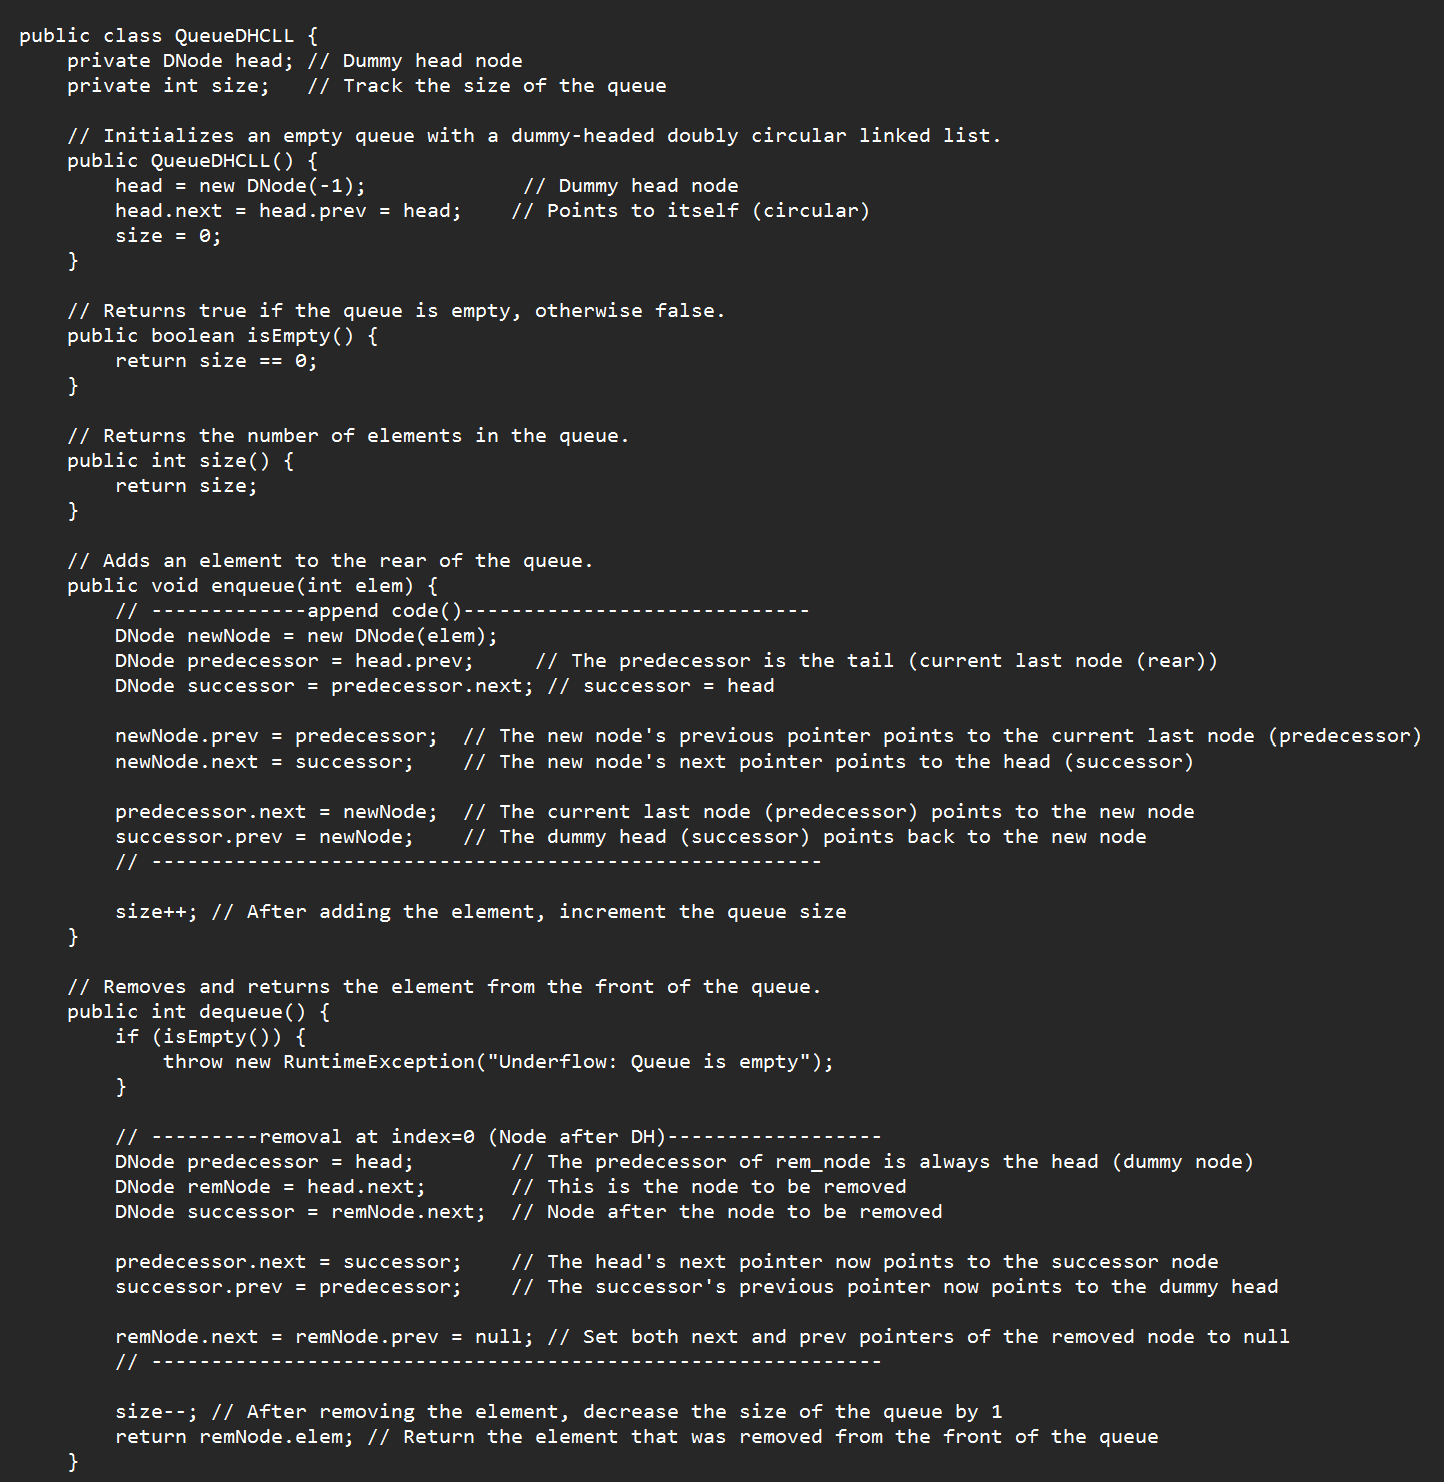

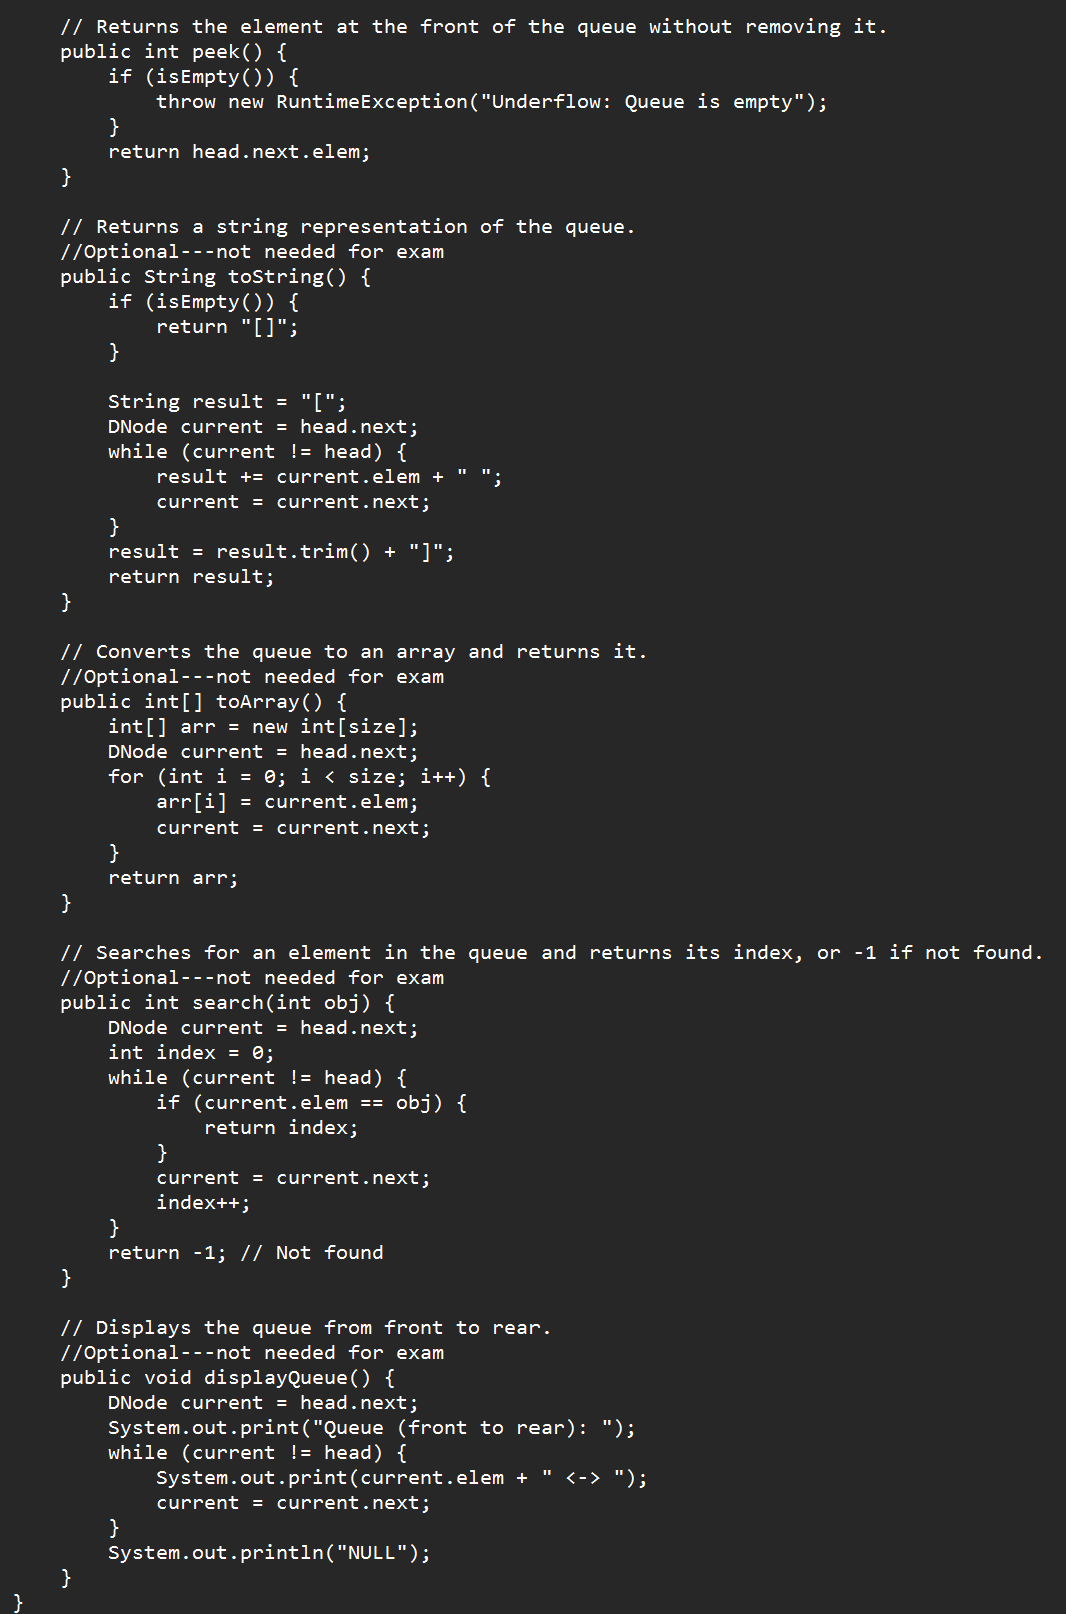

In [ ]:
# Test the QueueLL with additional methods for Dummy-Headed Doubly Circular Linked List
queue = QueueLL()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
queue.enqueue(40)

print("Original Queue:")
queue.display_queue()  #  Queue (front to rear): 10 <-> 20 <-> 30 <-> 40 <-> NULL

# Check size
print("Size of queue:", queue.size())  # 4

# Peek at front element
print("Peek at front element:", queue.peek())  #  Peek at front element: 10

# Search for an element
print("Search for 20 in the queue:", queue.search(20))  # Search for 20 in the queue: 1
print("Search for 40 in the queue:", queue.search(40))  #  Search for 40 in the queue: 3
print("Search for 60 in the queue:", queue.search(60))  #  Search for 60 in the queue: -1

# Convert queue to string and array
print("Queue as string:", queue.toString())  #  Queue as string: [10 20 30 40]
print("Queue as array:", queue.toArray())  #  Queue as array: [10, 20, 30, 40]

# Dequeue an element
rem1 = queue.dequeue()  # Removes 10 from the queue
print("Dequeued elem:", rem1)
rem2 = queue.dequeue()  # Removes 20 from the queue
print("Dequeued elem:", rem2)

print("Queue after dequeue:")
queue.display_queue()  #  Queue (front to rear): 30 <-> 40 <-> NULL

# Check size again
print("Size of queue after dequeue:", queue.size())  # Size of queue after dequeue: 2

Original Queue:
Queue (front to rear): 10 <-> 20 <-> 30 <-> 40 <-> NULL
Size of queue: 4
Peek at front element: 10
Search for 20 in the queue: 1
Search for 40 in the queue: 3
Search for 60 in the queue: -1
Queue as string: [10 20 30 40]
Queue as array: [10, 20, 30, 40]
Dequeued elem: 10
Dequeued elem: 20
Queue after dequeue:
Queue (front to rear): 30 <-> 40 <-> NULL
Size of queue after dequeue: 2


In [ ]:
# Empty the queue using a loop and trigger underflow errors
print("\nEmptying the queue...")
while not queue.is_empty():
    print("Dequeued element:", queue.dequeue())  #30, 40

# Trying to peek when the queue is empty (should raise an underflow error)
try:
    print("Peek at front element:", queue.peek())
except IndexError as e:
    print(f"Error: {e}") #Error: Queue is empty

# Trying to dequeue when the queue is empty (should raise an underflow error)
try:
    print("Dequeued element:", queue.dequeue())
except IndexError as e:
    print(f"Error: {e}")  # Error: Queue is empty


Emptying the queue...
Dequeued element: 30
Dequeued element: 40
Error: Underflow:Queue is empty
Error: Underflow: Queue is empty


## Reverse a Queue

#### Algorithm to Reverse a Queue Using a Stack

1. **Move elements from Queue to Stack**:
   - Dequeue elements from the queue and push them onto the stack. This reverses the order.

2. **Move elements from Stack back to Queue**:
   - Pop elements from the stack and enqueue them back into the queue.

3. **Return the reversed queue**.


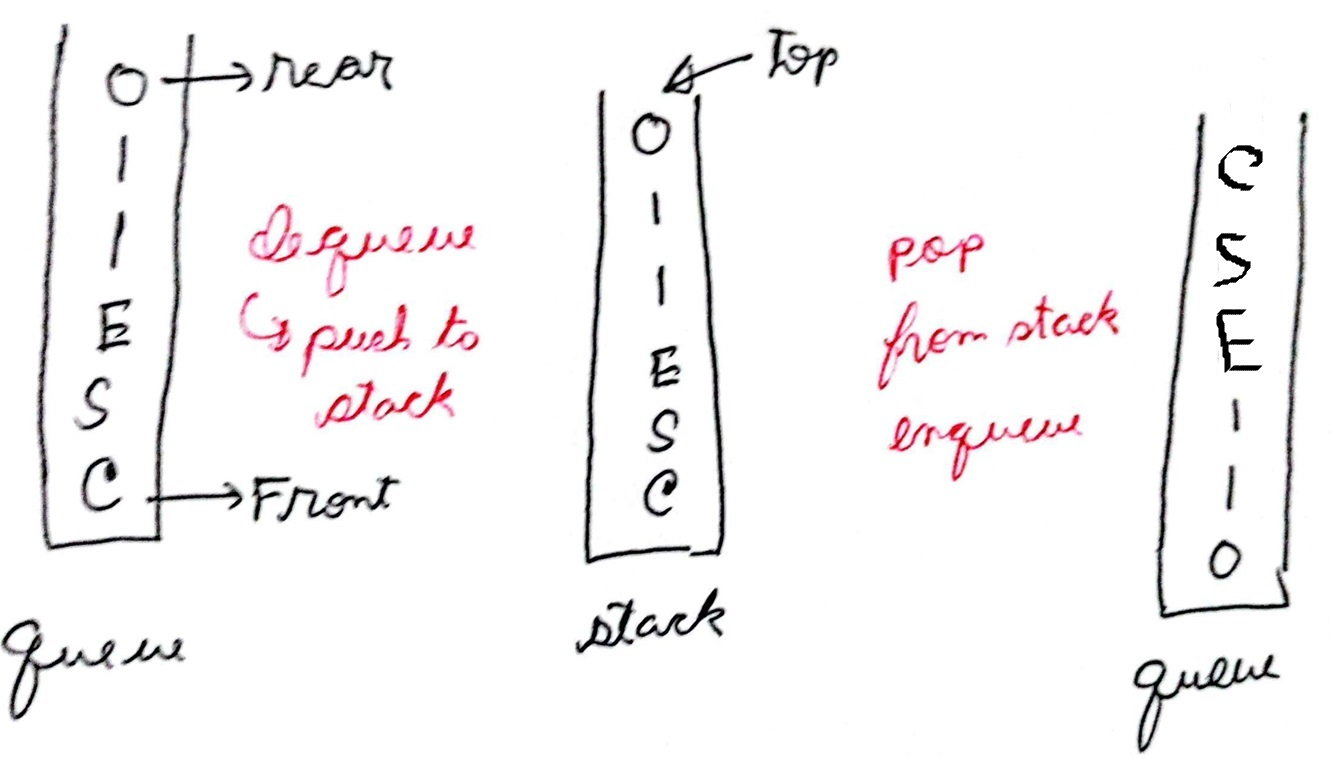

In [ ]:
class Node:
    def __init__(self, elem):
        self.elem = elem
        self.next = None

##############################################################################

class ListStack:
    def __init__(self):
        self.top = None  # Represents the top of the stack--HEAD here
        self.size = 0    # Tracks the size of the stack

    def is_empty(self):
        return self.size == 0

    def push(self, elem):  # Prepend--head changes
        new_node = Node(elem)
        new_node.next = self.top  # New node points to the current top
        self.top = new_node       # Update the top to the new node
        self.size += 1            # Increment size

    def pop(self):  # Remove top head--index 0--head changes
        if self.is_empty():
            raise IndexError("Underflow: Pop from empty stack")
        popped_elem = self.top.elem  # Retrieve the data of the top node
        self.top = self.top.next     # Update the top to the next node
        self.size -= 1               # Decrement size
        return popped_elem

    def peek(self):
        if self.is_empty():
            raise IndexError("Underflow: Peek from empty stack")
        return self.top.elem

    def get_size(self):
        return self.size

    def toString(self):
        current = self.top
        ans = "Stack (bottom -> top):"
        while current is not None:  # Top to bottom
            ans += " " + str(current.elem)
            current = current.next
        return ans


In [ ]:
# Function to reverse a queue using a stack
def reverse_queue(queue):
    stack = ListStack()

    # Move all elements from queue to stack
    while not queue.is_empty():
        stack.push(queue.dequeue())
    print(stack.toString())

    # Move all elements from stack back to queue
    while not stack.is_empty():
        queue.enqueue(stack.pop())

    return queue

# Driver code to test the reverse queue function
queue = QueueLL()

# Enqueue some elements to the queue
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
queue.enqueue(40)

print("Original Queue:")
queue.display_queue()  # Output: Queue: 10 -> 20 -> 30 -> 40 -> None

# Reverse the queue
queue = reverse_queue(queue)

print("Reversed Queue:")
queue.display_queue()  # Output: Queue: 40 -> 30 -> 20 -> 10 -> None

Original Queue:
Queue (front to rear): 10 <-> 20 <-> 30 <-> 40 <-> NULL
Stack (bottom -> top): 40 30 20 10
Reversed Queue:
Queue (front to rear): 40 <-> 30 <-> 20 <-> 10 <-> NULL


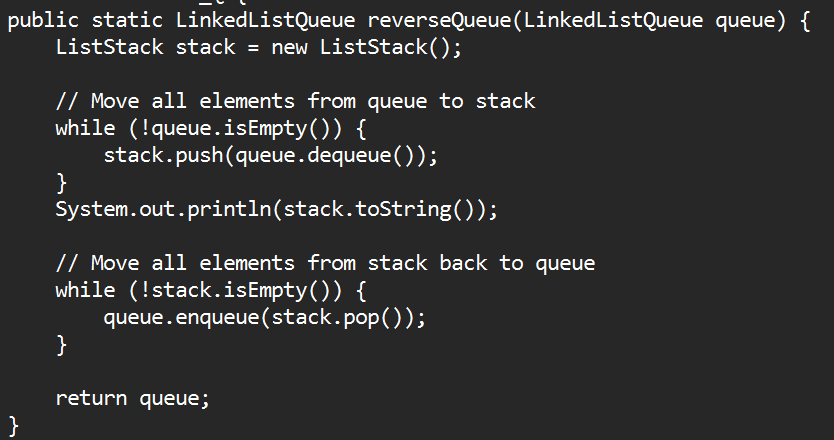

### Palindrome

A **palindrome** is a sequence of symbols that reads the same **backward** or **forward**.

## Examples:
- radar
- 31413
- Able was I ere I saw Elba
- GCATTACG
- A man, a plan, a canal - Panama

### Palindrome check


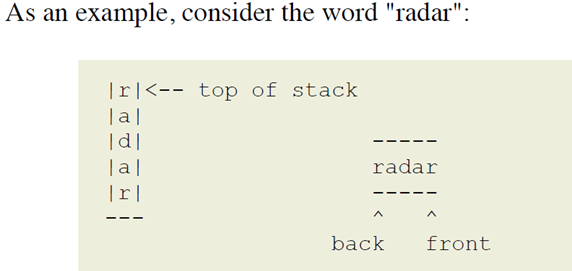

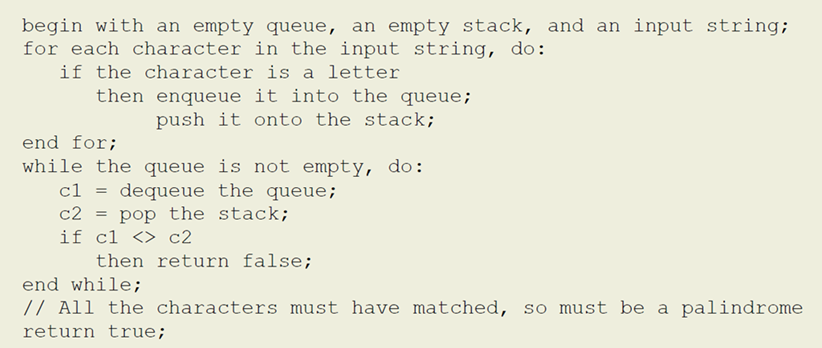

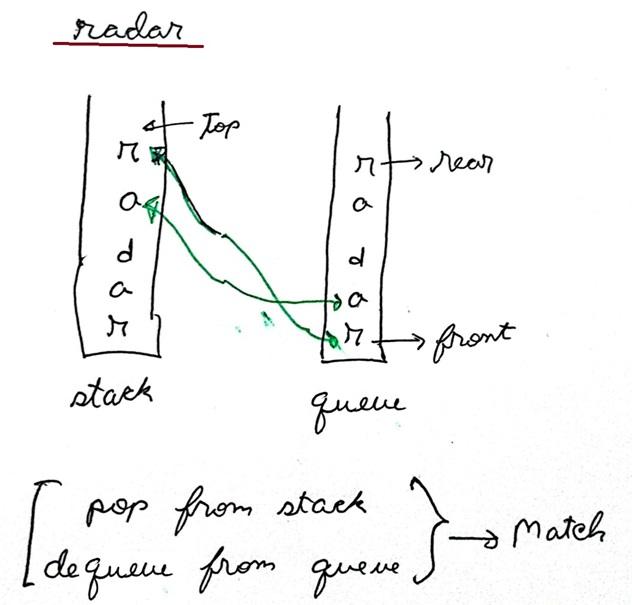

In [ ]:
def is_palindrome(data):
    stack = ListStack()  # Create an empty stack
    queue = QueueLL()  # Create an empty queue

    # Process each character: convert to lowercase and ignore non-alphabetic characters
    for char in data:
        if char.isalnum():  # Ignore spaces and special characters
            char = char.lower()
            stack.push(char)
            queue.enqueue(char)

    # Compare elements from stack and queue
    while not queue.is_empty():
        if queue.dequeue() != stack.pop():
            return False  # Not a palindrome

    return True  # It's a palindrome


words = ["radar", "hello", "Able was I ere I saw Elba", "A man, a plan, a canal - Panama"]

for word in words:
    if is_palindrome(word):
        print(f'"{word}" is a palindrome.')
    else:
        print(f'"{word}" is not a palindrome.')

"radar" is a palindrome.
"hello" is not a palindrome.
"Able was I ere I saw Elba" is a palindrome.
"A man, a plan, a canal - Panama" is a palindrome.


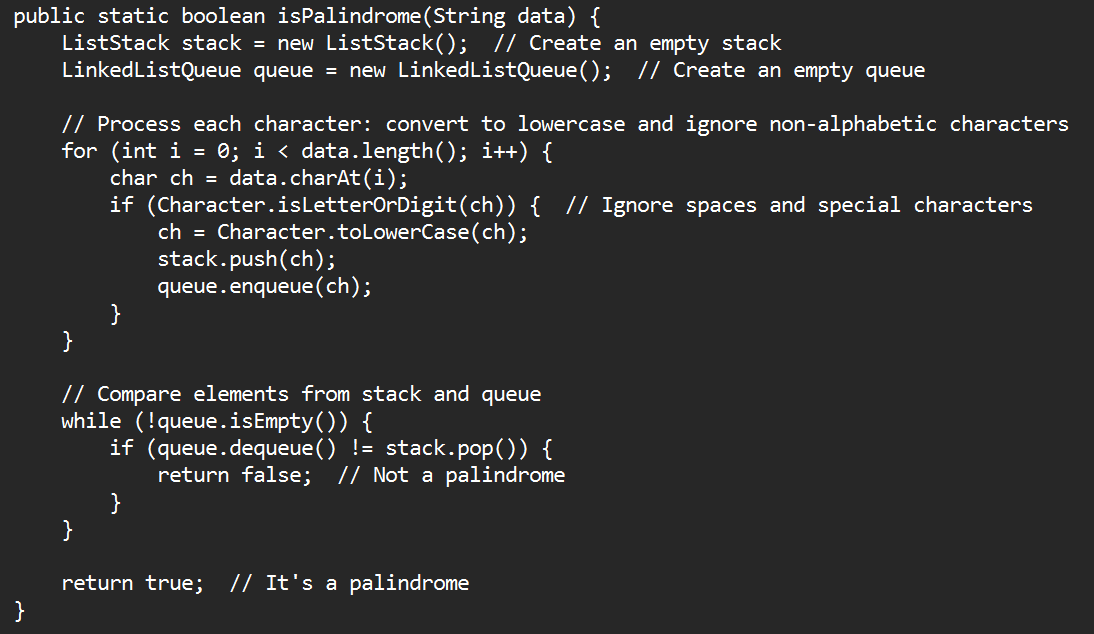

In [ ]:
def is_queue_palindrome(queue):
    stack = ListStack()  # Create an empty stack
    temp_queue = QueueLL()  # Create a temporary queue

    # Move elements from queue to stack and temp_queue
    while not queue.is_empty():
        elem = queue.dequeue()
        stack.push(elem)
        temp_queue.enqueue(elem)

    # Compare elements from stack and temp_queue
    while not temp_queue.is_empty():
        if temp_queue.dequeue() != stack.pop():
            return False  # Not a palindrome

    return True  # It's a palindrome

In [ ]:
# List of words to test
words = ["radar", "hello", "Able was I ere I saw Elba", "A man, a plan, a canal,- Panama"]

# Process each word
for word in words:
    queue = QueueLL()

    cleaned = ""
    for char in word:
        if char.isalpha():
            cleaned += char.lower()

    for char in cleaned:
        queue.enqueue(char)

    print(f"Testing word: \"{word}\"")
    queue.display_queue()

    if is_queue_palindrome(queue):
        print("→ The queue represents a palindrome.\n")
    else:
        print("→ The queue does not represent a palindrome.\n")

Testing word: "radar"
Queue (front to rear): r <-> a <-> d <-> a <-> r <-> NULL
→ The queue represents a palindrome.

Testing word: "hello"
Queue (front to rear): h <-> e <-> l <-> l <-> o <-> NULL
→ The queue does not represent a palindrome.

Testing word: "Able was I ere I saw Elba"
Queue (front to rear): a <-> b <-> l <-> e <-> w <-> a <-> s <-> i <-> e <-> r <-> e <-> i <-> s <-> a <-> w <-> e <-> l <-> b <-> a <-> NULL
→ The queue represents a palindrome.

Testing word: "A man, a plan, a canal,- Panama"
Queue (front to rear): a <-> m <-> a <-> n <-> a <-> p <-> l <-> a <-> n <-> a <-> c <-> a <-> n <-> a <-> l <-> p <-> a <-> n <-> a <-> m <-> a <-> NULL
→ The queue represents a palindrome.



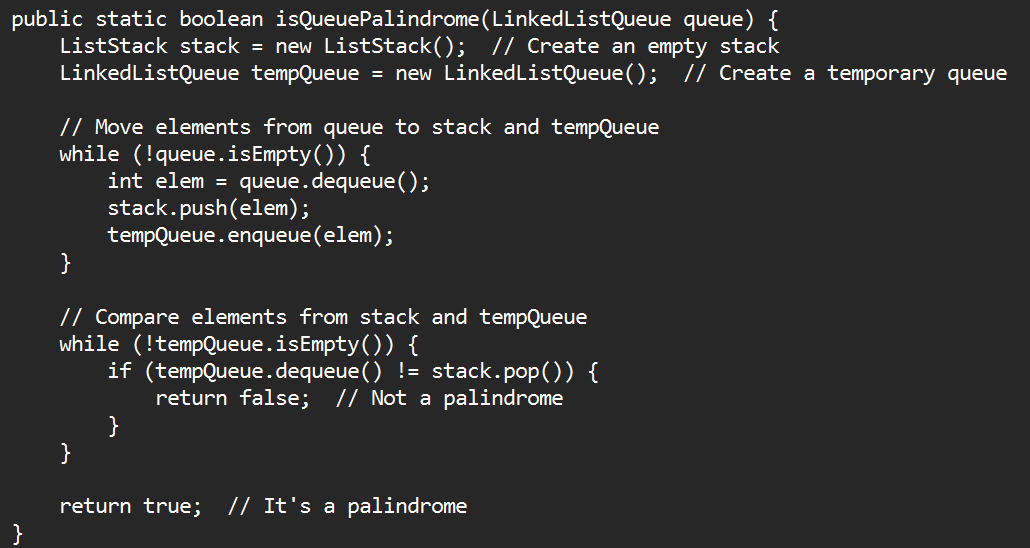

### Generate binary numbers--Optional

#### **Algorithm: Generate Binary Numbers Using a Queue**  

1. **Initialize a queue** and enqueue `1` (first binary number).  
2. **Repeat for `n` iterations**:  
   - Dequeue the front element and print it.  
   - Generate the next two binary numbers by appending `0` and `1` to it.  
   - Enqueue these new binary numbers.  
3. **End when `n` binary numbers are generated.**  


In [ ]:
def generate_binary_numbers(n):
    """Generates the first N binary numbers using a queue."""
    queue = QueueLL()
    queue.enqueue(1)

    for _ in range(n):
        front = queue.dequeue()
        print(front, end=" ")
        queue.enqueue(front * 10)
        queue.enqueue(front * 10 + 1)
    print()


n = 10  # Generate the first 10 binary numbers
print("First", n, "binary numbers:")
generate_binary_numbers(n)

n = 20  # Generate the first 20 binary numbers
print("First", n, "binary numbers:")
generate_binary_numbers(n)

First 10 binary numbers:
1 10 11 100 101 110 111 1000 1001 1010 
First 20 binary numbers:
1 10 11 100 101 110 111 1000 1001 1010 1011 1100 1101 1110 1111 10000 10001 10010 10011 10100 


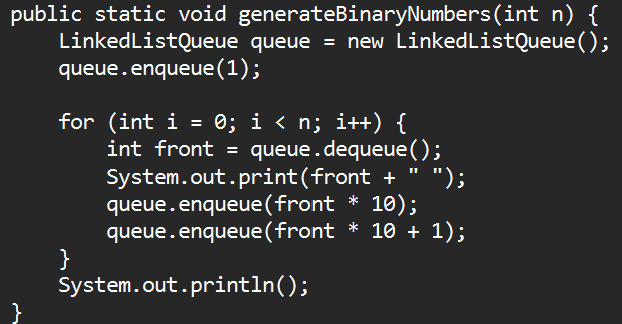

### Importance of Stacks and Queues--Optional

##### Building Blocks
- Stacks and queues are specialized forms of linked lists or arrays.
- They **do not introduce new functionalities** beyond their underlying structures.

##### Frequent Use Cases
- **Stacks**: Used in language parsing, expression evaluation, function calls, and graph traversals.
- **Queues**: Essential for CPU scheduling, message routing, and graph traversal.

##### Security & Integrity
- **Restricting direct access** to the **underlying list** prevents insecure manipulations.
- Prevents **unauthorized jumps in function call** stacks that could crash a system.

##### Efficiency & Hardware Implementation
- Their restricted operations **enable compact** code that fits in limited memory.
- Ideal for high-speed applications like network switches and routers.
